# Introduction to GIS in Python

 ##### Before beginning this course, there are some prerequisite steps required.<br>
 > Make sure these are all fulfilled before you continue.
- You should already have an Artifactory account set up. If not, contact the Service Desk and request for one.
- In the data folder, open the **Installation Guide for Geopandas** document and follow the instructions given.
- You should allow for up to 20 minutes to install the packages
- Once all the above requirements have all been met, you are ready to get started!

##### Getting started...

- Open The Intro to Geography in Python Template Notebook. 
- As you make your way through the guided excercises on this Notebook, you may use the Template as you workspace.
- Read through each exercise and try out your solution on the Template Notebook and check your output against the solution on this Notebook.<br>

*Goodluck!*

## 1 Set up Python

- On Github, download the data folder.
- Move it to your local drive.

## 1.1 Quick Python basics
- Python is case sensitive - read_csv is not the same as read_CSV.
- New objects are created using the **`=`** notation, e.g `new_object = 2 * 5` .
- To overwrite an object use **`=`** and its current name, e.g. **`current_object = current_object.buffer(1000)`**. 
- To see a function’s documentation in Python, pass the function inside the brackets of the **`.help()`** function.
- Write in the code editor (script) and execute your code line by line.
- Use Ctrl + Enter to execute the current line of code.

## 1.2 Install & load Python libraries

In [1]:
import pandas as pd
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt 
import folium
import mapclassify
from mapclassify import Quantiles, UserDefined
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
%matplotlib inline

## 2 Aims

**By the end of today you will:**

- Understand what spatial data and GIS are.
- Know how to use the Open Geography Portal.
- Be aware of map projections and Coordinate Reference Systems (CRS) and be able to modify them.
- Be able to load and manipulate spatial data in Python using the geopandas library.
- Be familiar with using GSS codes to join statistics to geographies.
- Understand how to use spatial joins.
- Know how to make static maps in matplotlib.
- Be able to export your maps and shapefiles.

## 3 GIS & Spatial Data

**GIS** stands for Geographic Information System/Science - the System part refers to the software used for capturing, storing, and manipulating spatial data, while the Science definition is concerned with scientific principles behind spatial analysis, and developing new methods and approaches to extract insight from geographic data.

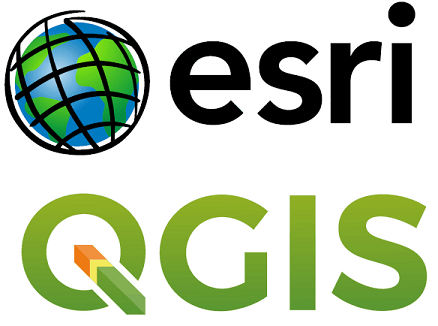

**Spatial Data ** - any data set which has, or has the potential to have, location attached to it. This includes, but is not limited to, coordinates, addresses, and geography codes.

** Spatial data types: **

- Vector - points, lines, and polygons used to represent physical and administrative features. Used for displaying data with well defined extent.

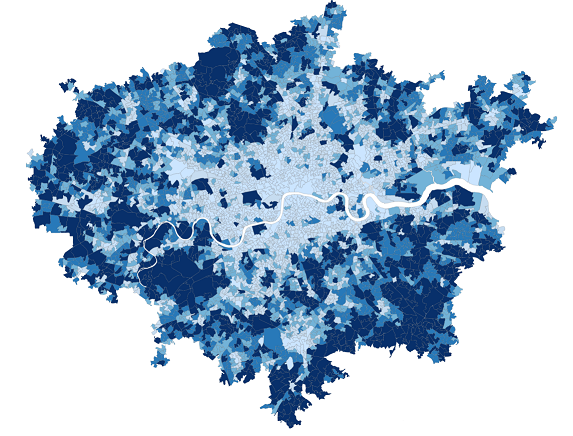

- Raster - pixel based data, often derived from satellite imagery. Used for displaying continuous or fuzzy variables.

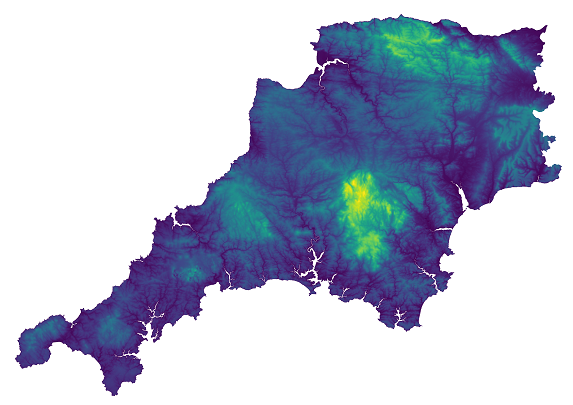

** Common spatial data formats: **

- Shapefile (.shp)
- GeoPackage (.gpkg) / Geodatabase (.gdb)
- GeoJSON / TopoJSON
- Well-known-text
- GeoTiff

## 3.1 Map Projection and Coordinate Reference System

_In cartography, a map projection is a way to flatten a globe’s surface into a plane in order to make a map. This requires a systematic transformation of the latitudes and longitudes of locations from the surface of the globe into locations on a plane. All projections of a sphere on a plane necessarily distort the surface in some way and to some extent. Depending on the purpose of the map, some distortions are acceptable and others are not; therefore, different map projections exist in order to preserve some properties of the sphere-like body at the expense of other properties. Every distinct map projection distorts in a distinct way, by definition._

Source: Wikipedia
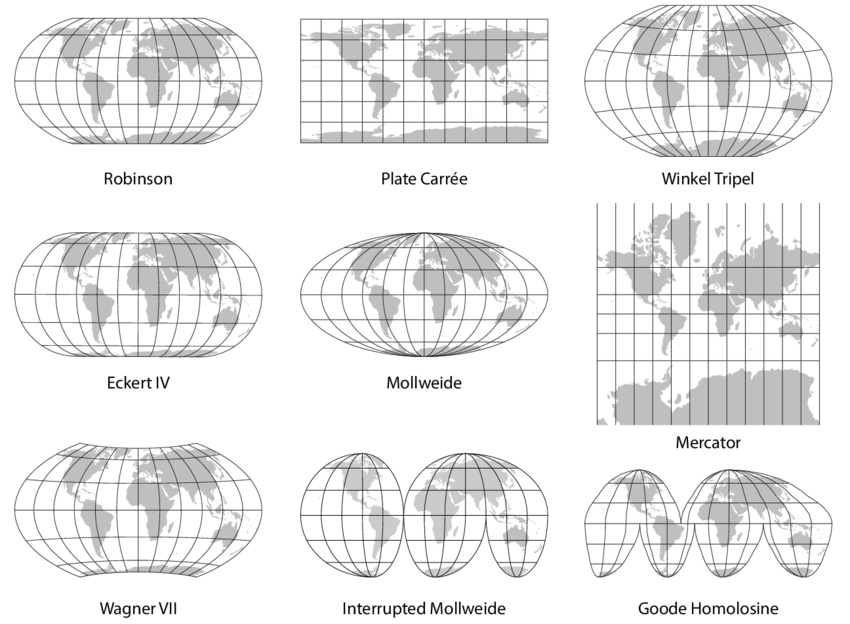

**All you need to know for today is:**

- When working with GB data use the British National Grid (BNG).
- BNG uses Eastings and Northings which are given as metres, offset from the origin point.
- BNG’s EPSG code is 27700.

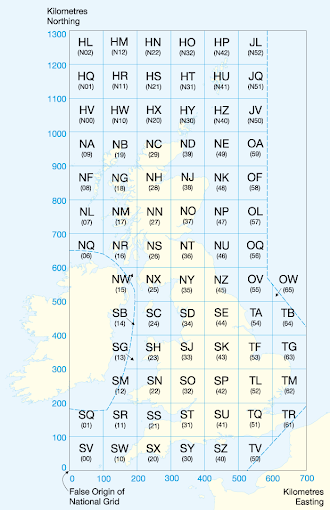

## 3.2 Sources of spatial data
When working with most types of data you will most commonly need to link them to official administrative and census boundaries, as well as more general geographic data. Most national and local governments will have a geography portal where boundaries can be downloaded. At ONS boundaries, lookups, and documentation can be downloaded from the Open Geography Portal, while other geographic featues can be accessed from the Ordnance Survey.

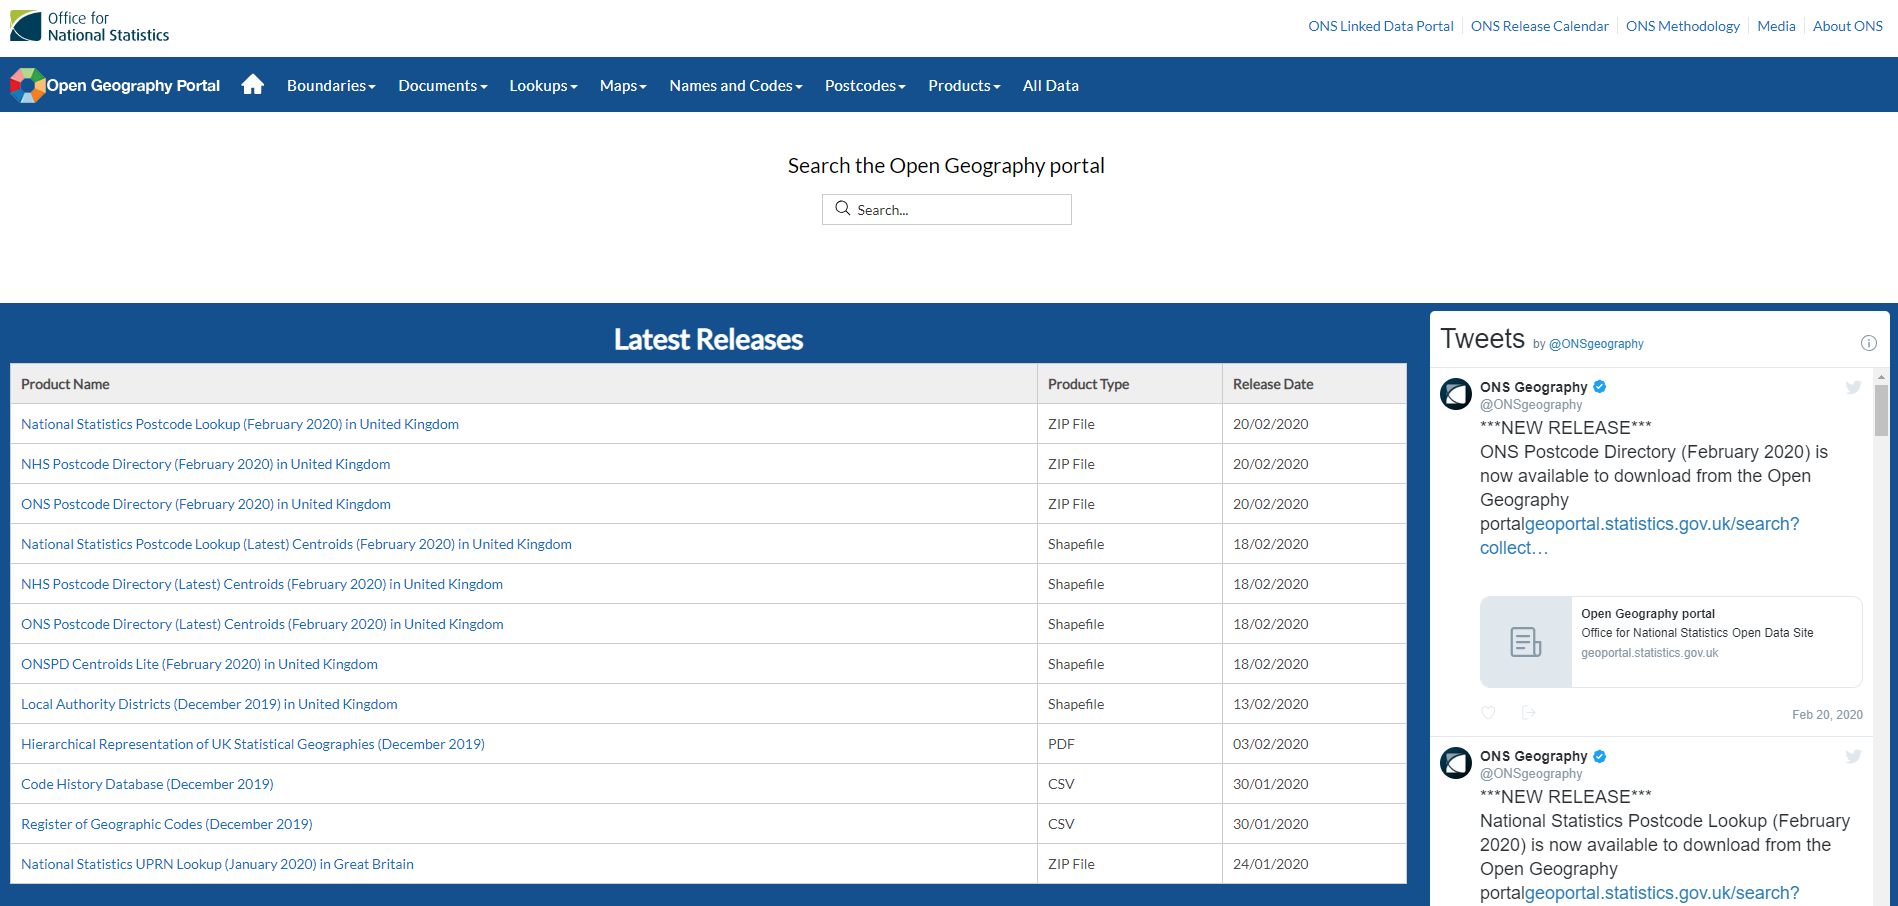

Boundaries managed by the ONS come in several resolutions (more generalised boundaries sacrifice accuracy and precision for file size and processing speeds):

- F - Full resolution
- G - Generalised
- U - Ultra generalised

and extents (extent determines where the land/water boundary is - extent of the realm includes areas of water):

- C - Clipped to coastline
- E - Extent of the realm

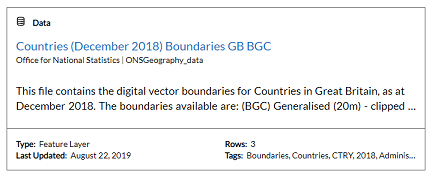

3.2.1 Exercise - Open Geography Portal
- Go to the Open Geography Portal and download the 2019 Local Authority District BGC boundaries. Save them to data/shp in your project structure and unzip.
- Open the folder and see how many different files there are.

## 4 London Fire Brigade Animal Rescue Data
Throughout this tutorial we will be using data from the London Fire Brigade - LFB Animal Rescue Data. It covers all incidents between 2009 and 2020 which included assistance to animals that may be trapped or in distress. The data is updated monthly and includes a range of variables for each incident including some location information (postcode, borough, ward),the date/time of the incidents, cost, and type of animal in trouble.

We want to visualise, and better understand how much money has been spent on animal related incidents between 2009 and 2020, and what the distribution is at the MSOA level of geography. To achieve this we will have to import spatial data, manipulate it and create summary statistics, and then plot it

## 4.1 Loading spatial and non-spatial data
LFB data has been tidied up and saved as a Comma Separated Value file (.csv). We can use **`read_csv`** to open it in Python.

### 4.1.1 Exercise - open LFB data
- Create a new object called **`lfb`** by using **`read_csv()`**. Load data located in “data/csv/lfb_2009_2020.csv”.
- Use **`.head()`** to view **`lfb`** structure.

**Solution**

In [2]:
lfb = pd.read_csv(r'R:\Musa\Geospatial\2021\Spatial\Intro_GIS_Python\data\csv\lfb_2009_2020.csv')
lfb.head()

incident_number  cal_year type_of_incident  cost_gbp  \
0              D1      2009  Special Service     510.0   
1              F2      2009  Special Service     255.0   
2              D3      2009  Special Service     255.0   
3              H4      2009  Special Service     255.0   
4              R5      2009  Special Service     255.0   

                           final_description animal_group_parent  \
0  DOG WITH JAW TRAPPED IN MAGAZINE RACK,B15                 Dog   
1          ASSIST RSPCA WITH FOX TRAPPED,B15                 Fox   
2                    DOG CAUGHT IN DRAIN,B15                 Dog   
3                  HORSE TRAPPED IN LAKE,J17               Horse   
4              RABBIT TRAPPED UNDER SOFA,B15              Rabbit   

   property_category  ward_code                            ward  \
0           Dwelling  E05011467  Crystal Palace & Upper Norwood   
1  Outdoor Structure  E05000169                        Woodside   
2  Outdoor Structure  E05000558              Carshalton Central   
3    Non Residential  E05000330                       Harefield   
4           Dwelling  E05000310                        Gooshays   

  stn_ground_name  easting  northing  
0         Norbury   532350    170050  
1        Woodside   534750    167550  
2      Wallington   528050    164950  
3         Ruislip   504650    190650  
4     Harold Hill   554650    192350

lfb is currently just a data frame. It has not got an explicit geometry column which links observations to their geographic location. It does however contain several columns which can be used to convert it into a spatial data format.

Ward_code column references the GSS codes of wards within which the observations fall. GSS codes can be used to join lfb data to boundaries from the Open Geography Portal. One issue with this particular column is that it does not indicate the currency of GSS codes. Wards are subject to frequent change, and as such it is best practice to be clear about the dates of any boundaries used by stating the exact code used, e.g. wd19cd. Because LFB data does not include this information we have no guarantee that the boundaries and GSS codes we join will match.

Fortunately we have also been provided with columns recording the easting, and northing of each incident. We can use those to convert **`lfb`** into a GeoDataFrame. A GeoDataFrame is a spatially enabled pandas DataFrame meaning that everything you know about how to work with a pandas DataFrame can be used for this aswell. To achieve this we will use the **`gpd.GeoDataFrame()`** function which takes the following arguments:<br>
>**`new_object = gpd.GeoDataFrame(input_data_frame, geometry = gpd.points_from_xy(input_data_frame.x_coordinate_column, input_data_frame.y_coordinate_column), crs = 27700)`**

In [3]:
lfb_gdf  = gpd.GeoDataFrame(lfb,
                              geometry=gpd.points_from_xy(lfb.easting, 
                                                          lfb.northing), crs = 'EPSG:27700')

In [4]:
lfb_gdf.head()

incident_number  cal_year type_of_incident  cost_gbp  \
0              D1      2009  Special Service     510.0   
1              F2      2009  Special Service     255.0   
2              D3      2009  Special Service     255.0   
3              H4      2009  Special Service     255.0   
4              R5      2009  Special Service     255.0   

                           final_description animal_group_parent  \
0  DOG WITH JAW TRAPPED IN MAGAZINE RACK,B15                 Dog   
1          ASSIST RSPCA WITH FOX TRAPPED,B15                 Fox   
2                    DOG CAUGHT IN DRAIN,B15                 Dog   
3                  HORSE TRAPPED IN LAKE,J17               Horse   
4              RABBIT TRAPPED UNDER SOFA,B15              Rabbit   

   property_category  ward_code                            ward  \
0           Dwelling  E05011467  Crystal Palace & Upper Norwood   
1  Outdoor Structure  E05000169                        Woodside   
2  Outdoor Structure  E05000558              Carshalton Central   
3    Non Residential  E05000330                       Harefield   
4           Dwelling  E05000310                        Gooshays   

  stn_ground_name  easting  northing                       geometry  
0         Norbury   532350    170050  POINT (532350.000 170050.000)  
1        Woodside   534750    167550  POINT (534750.000 167550.000)  
2      Wallington   528050    164950  POINT (528050.000 164950.000)  
3         Ruislip   504650    190650  POINT (504650.000 190650.000)  
4     Harold Hill   554650    192350  POINT (554650.000 192350.000)

**`gpd.GeoDataFrame()`** converted the easting and northing columns to simple feature geometries and created a new column called geometry which holds spatial information for each row. Now that **lfb** is a spatial object we can plot it using the matplotlib package. For now we will use the **`.plot()`** function which creates a map, then run the **`plt.show()`** function to visualise the map.

## 4.1.3 Exercise - quick static maps
- Plot **`lfb_gd`f** using the **`.plot()`** function.

*Solution*

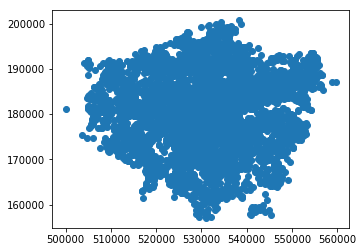

In [5]:
lfb_gdf.plot()

## 4.2 Filtering by GSS code
It looks like some of the locations are located outside of London, however we are only interested in incidents within the Local Authority Districts making up Greater London. To remove all points outside of London we will have to first import the LAD boundaries which we downloaded from the Open Geography Portal and then use them to spatially filter **`lfb_gdf`** data.

So far we have created our own sf objects by adding a geometry column. The LAD data set is already a spatial one and as such we can use the **`gpd.read_file()`** function from the Geopandas package to import it. **`gpd.read_file()`** is extremely versatile and able to import most spatial data formats into Python. The only argument that needs to be supplied to **`gpd.read_file()`** is the full path to the LAD boundaries

## 4.2.1 Exercise - loading shapefiles
- Use **`gpd.read()`** to load the LAD boundaries as **`lad_2019`**.

- LAD path - K:\UK Government Boundaries\2019 Boundaries\Admin\Local_Authority_Districts\December\UK\LAD_DEC_2019_UK_BGC.shp

- Make a static map of the object you have just created using **`.plot()`**.<br>
>*Solution*

In [6]:
lad_2019 = gpd.read_file(r'R:\Musa\Geospatial\2021\Spatial\Intro_GIS_Python\data\shp\LAD_2019_UK\LAD_DEC_2019_UK_BGC.shp')

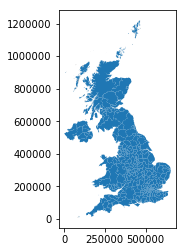

In [7]:
lad_2019.plot()

LAD boundaries have loaded correctly but they currently cover all of the UK when all we need is London. Because GeoDataFrames are data frames with a geometry column attached, any operations that we would perform on a normal data frame can also be performed on a GeoDataFrame. Here we will use **`.loc`** and **`.str.startswith()`** from pandas to only keep LADs whose GSS code starts with “E09”.

## 4.2.2 Exercise - filter spatial data by variable
- Inspect **`lad_2019`** using **`.head()`**, and identify which column holds the GSS codes - it should end in “cd”.
- Create a new object called **`london_lad`**. Use **`.loc`** alongside **`.str.startswith()`** to only keep observations which have a GSS code starting with “E09”.
- Plot **`london_lad`** to see if the results look correct.

*Solution*

In [8]:
lad_2019.head()

LAD19CD               LAD19NM LAD19NMW   BNG_E   BNG_N      LONG  \
0  E06000001            Hartlepool     None  447160  531474 -1.270189   
1  E06000002         Middlesbrough     None  451141  516887 -1.210998   
2  E06000003  Redcar and Cleveland     None  464361  519597 -1.006086   
3  E06000004      Stockton-on-Tees     None  444940  518183 -1.306645   
4  E06000005            Darlington     None  428029  515648 -1.568356   

         LAT                                           geometry  
0  54.676141  POLYGON ((447097.001 537152.001, 447228.798 53...  
1  54.544679  MULTIPOLYGON (((451965.636 521061.756, 452174....  
2  54.567525  MULTIPOLYGON (((451747.397 520561.100, 451792....  
3  54.556912  MULTIPOLYGON (((447239.599 517911.799, 447176....  
4  54.535345  POLYGON ((423475.701 524731.597, 423497.204 52...

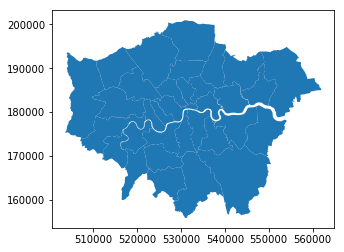

In [9]:
london_lad = lad_2019.loc[lad_2019['LAD19CD'].str.startswith('E09')]
london_lad.plot()

Finally, for the next step, we only need the outer boundary of London - all the internal LAD boundaries have to be removed and only the outer edges kept. Geopandas has a function exactly for this purpose called **`.dissolve()`**. It only takes one argument, which is the GeoDataFrame we want to dissolve. But first, we will have to create a new column and assign it a common variable for the dissolve function.

## 4.2.3 Exercise - dissolve boundaries
- Create a new column and assign a common variable for all rows
- Create a new object called **`london_boundary`** using the **`.dissolve()`** function.
- Plot it to check the results.

*Solution*

In [10]:
london_lad = london_lad.assign(group=1)
london_boundary = london_lad.dissolve(by = 'group')
london_lad.head()

LAD19CD               LAD19NM LAD19NMW   BNG_E   BNG_N      LONG  \
284  E09000001        City of London     None  532381  181359 -0.093533   
285  E09000002  Barking and Dagenham     None  547757  185111  0.129479   
286  E09000003                Barnet     None  523472  191753 -0.218211   
287  E09000004                Bexley     None  549203  175435  0.146227   
288  E09000005                 Brent     None  519615  186468 -0.275686   

           LAT                                           geometry  group  
284  51.515653  MULTIPOLYGON (((531660.508 180558.547, 531629....      1  
285  51.545556  MULTIPOLYGON (((543730.589 184059.079, 543871....      1  
286  51.611081  POLYGON ((524645.198 198138.303, 524810.701 19...      1  
287  51.458235  MULTIPOLYGON (((552888.150 175565.300, 552869....      1  
288  51.564414  POLYGON ((520113.102 190480.805, 520641.000 18...      1

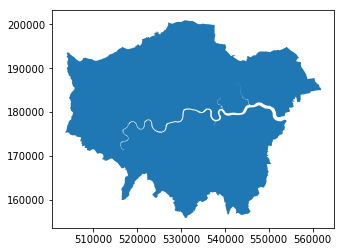

In [11]:
london_boundary.plot()

## 4.3 Spatial subsetting and CRS
In addition to subsetting by value, as we did with the LAD boundaries earlier, we can also subset observations by evaluating their spatial relationship with another data set. We can for example select all LADs which are fully within Wales, every Output Area intersected by a river, or all households outside of city boundaries. There are a number of different spatial relationships which can be tested and used to subset observations.

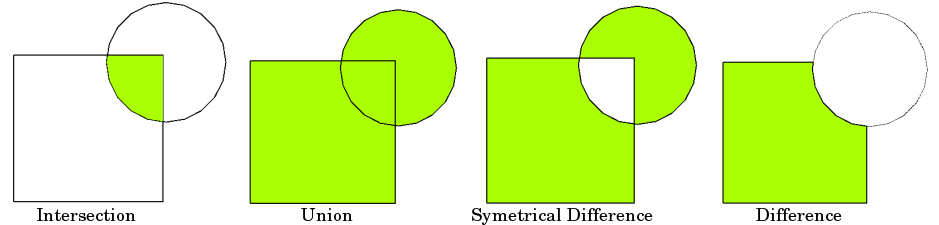

Geopandas has an inbuilt function called Overlay which we can use to spatially subset observations. The function takes several arguments:<br>
>*e.g.* **`spatial_subset = gpd.overlay(gpd1, gpd2, how ='operation')`**

- gdf1 - The GeoDataFrame we want to subset - **`lfb_gdf`**
- gdf2 - The GeoDataFrame used to evaluate the spatial relationship - **`london_boundary`**
- how - This is the argument where the operation is defined. 


- With the **Intersection** operation, the returned output will be only those geometries that are contained by both GeoDataFrames.
- The **Symmetrical difference** operation is the opposite of **intersection** in that it returns the geometries that are only part of one of the GeoDataFrame but not part of both.
- The **Difference** operation returns geometries that are part of one GeoDataFrame but are not contained in the second GeoDataFrame.
- With the **Union** operation, all possible geometries are returned.


Before running any spatial operations on two spatial objects it is always worth checking if their coordinate reference systems (CRS) match. Geopandas will throw an error if that’s not the case. Try it for yourself below.

## 4.3.1 Exercise - spatial subset part 1
- Use gpd.overlay to spatially subset **`lfb_gpd`** by testing its relationship with **`london_boundary`**.
- Use the 'intesection' operation

*Solution:*

In [12]:
lfb_london = gpd.overlay(lfb_gdf, london_boundary, how='intersection')

C:\Python36\lib\site-packages\geopandas\base.py:48: UserWarning: GeoSeries crs mismatch: EPSG:27700 and PROJCS["British_National_Grid",GEOGCS["GCS_OSGB_1936",DATUM["OSGB_1936",SPHEROID["Airy_1830",6377563.396,299.3249646]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",400000.0],PARAMETER["False_Northing",-100000.0],PARAMETER["Central_Meridian",-2.0],PARAMETER["Scale_Factor",0.9996012717],PARAMETER["Latitude_Of_Origin",49.0],UNIT["Meter",1.0]]
  warn("GeoSeries crs mismatch: {0} and {1}".format(this.crs, other.crs))


## 4.3.2 Exercise - check CRS
- Run gdf.crs on each GeoDataFrame and compare the results.
- Another option is to run a boolean check on both GeoDataFrames and see what we get.

*Solution:*


In [13]:
lfb_gdf.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°46'N to 61°01'N, 7°33'W to 3°33'E
- bounds: (-9.2, 49.75, 2.88, 61.14)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [14]:
london_boundary.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

**Boolean check**

In [15]:
london_boundary.crs == lfb_gdf.crs

False

## 4.3.3 Exercise - change CRS
- Match the crs on both GeoDataFrames by setting the **`london_boundary.crs`** to **`lfb_gdf.crs`**
- Run a boolean check again to make sure they now match

*Setting london.crs to **`lfb_gdf.crs`***

In [16]:
london_boundary.crs = lfb_gdf.crs

*Check if they now match*

In [17]:
london_boundary.crs == lfb_gdf.crs

True

## 4.3.4 Exercise - spatial subset part 2
- Use gpd.overlay to spatially subset **`lfb_gdf`** by testing its relationship with **`london_boundary`**. Overwrite **`lfb_gdf`** with the subset data. This means that all points falling outsite the london boundary are removed from the **`lfb_london dataset`**
- Plot it to check if the results are correct.

*Solution:*

In [18]:
lfb_gdf = gpd.overlay(lfb_gdf, london_boundary, how='intersection')

In [19]:
lfb_gdf.head()

incident_number  cal_year type_of_incident  cost_gbp  \
0              D1      2009  Special Service     510.0   
1              F2      2009  Special Service     255.0   
2              D3      2009  Special Service     255.0   
3              H4      2009  Special Service     255.0   
4              R5      2009  Special Service     255.0   

                           final_description animal_group_parent  \
0  DOG WITH JAW TRAPPED IN MAGAZINE RACK,B15                 Dog   
1          ASSIST RSPCA WITH FOX TRAPPED,B15                 Fox   
2                    DOG CAUGHT IN DRAIN,B15                 Dog   
3                  HORSE TRAPPED IN LAKE,J17               Horse   
4              RABBIT TRAPPED UNDER SOFA,B15              Rabbit   

   property_category  ward_code                            ward  \
0           Dwelling  E05011467  Crystal Palace & Upper Norwood   
1  Outdoor Structure  E05000169                        Woodside   
2  Outdoor Structure  E05000558              Carshalton Central   
3    Non Residential  E05000330                       Harefield   
4           Dwelling  E05000310                        Gooshays   

  stn_ground_name  easting  northing    LAD19CD         LAD19NM LAD19NMW  \
0         Norbury   532350    170050  E09000001  City of London     None   
1        Woodside   534750    167550  E09000001  City of London     None   
2      Wallington   528050    164950  E09000001  City of London     None   
3         Ruislip   504650    190650  E09000001  City of London     None   
4     Harold Hill   554650    192350  E09000001  City of London     None   

    BNG_E   BNG_N      LONG        LAT                       geometry  
0  532381  181359 -0.093533  51.515653  POINT (532350.000 170050.000)  
1  532381  181359 -0.093533  51.515653  POINT (534750.000 167550.000)  
2  532381  181359 -0.093533  51.515653  POINT (528050.000 164950.000)  
3  532381  181359 -0.093533  51.515653  POINT (504650.000 190650.000)  
4  532381  181359 -0.093533  51.515653  POINT (554650.000 192350.000)

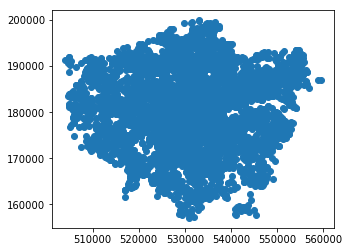

In [20]:
lfb_gdf.plot()

In [21]:
lfb_gdf.head()

incident_number  cal_year type_of_incident  cost_gbp  \
0              D1      2009  Special Service     510.0   
1              F2      2009  Special Service     255.0   
2              D3      2009  Special Service     255.0   
3              H4      2009  Special Service     255.0   
4              R5      2009  Special Service     255.0   

                           final_description animal_group_parent  \
0  DOG WITH JAW TRAPPED IN MAGAZINE RACK,B15                 Dog   
1          ASSIST RSPCA WITH FOX TRAPPED,B15                 Fox   
2                    DOG CAUGHT IN DRAIN,B15                 Dog   
3                  HORSE TRAPPED IN LAKE,J17               Horse   
4              RABBIT TRAPPED UNDER SOFA,B15              Rabbit   

   property_category  ward_code                            ward  \
0           Dwelling  E05011467  Crystal Palace & Upper Norwood   
1  Outdoor Structure  E05000169                        Woodside   
2  Outdoor Structure  E05000558              Carshalton Central   
3    Non Residential  E05000330                       Harefield   
4           Dwelling  E05000310                        Gooshays   

  stn_ground_name  easting  northing    LAD19CD         LAD19NM LAD19NMW  \
0         Norbury   532350    170050  E09000001  City of London     None   
1        Woodside   534750    167550  E09000001  City of London     None   
2      Wallington   528050    164950  E09000001  City of London     None   
3         Ruislip   504650    190650  E09000001  City of London     None   
4     Harold Hill   554650    192350  E09000001  City of London     None   

    BNG_E   BNG_N      LONG        LAT                       geometry  
0  532381  181359 -0.093533  51.515653  POINT (532350.000 170050.000)  
1  532381  181359 -0.093533  51.515653  POINT (534750.000 167550.000)  
2  532381  181359 -0.093533  51.515653  POINT (528050.000 164950.000)  
3  532381  181359 -0.093533  51.515653  POINT (504650.000 190650.000)  
4  532381  181359 -0.093533  51.515653  POINT (554650.000 192350.000)

## 4.4 Spatial and non-spatial joins

Simple features data can be joined to other data sets in two ways. We can either use a traditional, SQL like join, based on a value shared across the data sets or, since we have a geometry column, on the spatial relationship between the data sets. This is known as a spatial join, where variables from one data set are joined to another one only on the basis of their spatial relationship. The most commonly used operation is known as a Point-in-Polygon join where data from a polygon is joined to the points within them.

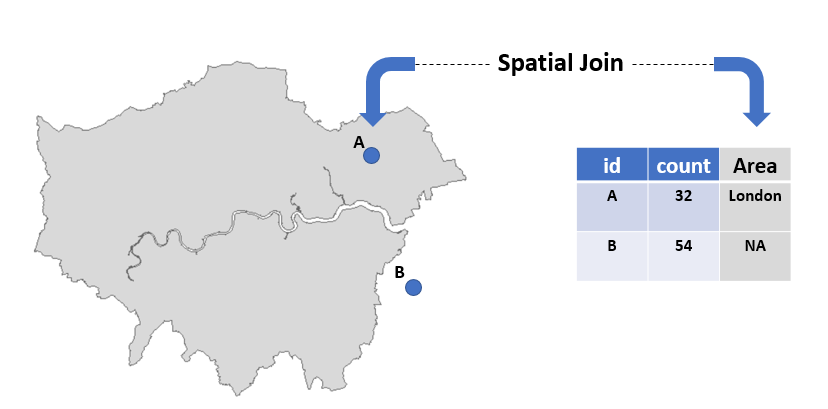

In Geopandas spatial joins are handled using the **`gpd.sjoin()`** function with arguments:<br>
>*e.g.* **`join_output = gpd.sjoin(gdf1, gdf2, how = 'inner', op = 'intersects')`**

- gdf1 - The GeoDataFrame to which we are joining data (LHS in SQL)
- gdf2 - The GeoDataFrame whose variables are being joined (RHS in SQL)
- how - The type of join we want to make
- op - The spatial operation we are using to perform the spatial join

We will be joining the Middle Super Output Areas to LFB locations, which will then allow us to group and plot data at MSOA level.

## 4.4.1 Exercise - spatial joins
- Read in data/shp/MSOA_2011_london/msoa_2011_ew_bgc.shp as **`msoa_london`** - use **`gpd.read()`**
- Check if **`msoa_london`**’s CRS and that of **`lfb_gdf`** match. Change **`msoa_london`** crs if necessary.
- Create a new object called **`london_msoa_lfb`** by running **`gpd.sjoin()`** between **`lfb_gdf`** and **`msoa_london`**
- Inspect your new object using **.`head()`** to see what columns have been added.

In [22]:
msoa_london = gpd.read_file(r'R:\Musa\Geospatial\2021\Spatial\Intro_GIS_Python\data\shp\MSOA_2011_london\msoa_2011_ew_bgc.shp')

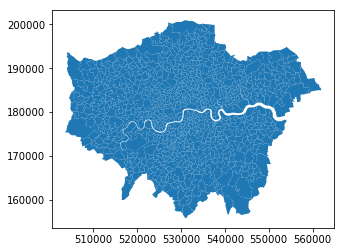

In [23]:
msoa_london.plot()

In [24]:
msoa_london.head()

msoa11cd                  msoa11nm  \
0  E02000001        City of London 001   
1  E02000002  Barking and Dagenham 001   
2  E02000003  Barking and Dagenham 002   
3  E02000004  Barking and Dagenham 003   
4  E02000005  Barking and Dagenham 004   

                                            geometry  
0  MULTIPOLYGON (((531667.621 180534.992, 531647....  
1  POLYGON ((548881.560 190845.265, 548881.122 19...  
2  POLYGON ((549102.435 189324.625, 548954.497 18...  
3  POLYGON ((551549.995 187364.637, 551477.997 18...  
4  POLYGON ((549099.631 187656.076, 549161.372 18...

In [25]:
msoa_london.crs

<Projected CRS: PROJCS["Transverse_Mercator",GEOGCS["GCS_Airy 1830 ...>
Name: Transverse_Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: unknown
- Ellipsoid: airy
- Prime Meridian: Greenwich

In [26]:
msoa_london.crs = lfb_gdf.crs

In [27]:
msoa_london.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°46'N to 61°01'N, 7°33'W to 3°33'E
- bounds: (-9.2, 49.75, 2.88, 61.14)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [28]:
london_msoa_lfb = gpd.sjoin(msoa_london, lfb_gdf, how = 'inner', op = 'intersects')

In [29]:
london_msoa_lfb

msoa11cd            msoa11nm  \
0    E02000001  City of London 001   
0    E02000001  City of London 001   
0    E02000001  City of London 001   
0    E02000001  City of London 001   
0    E02000001  City of London 001   
..         ...                 ...   
982  E02006931       Greenwich 038   
982  E02006931       Greenwich 038   
982  E02006931       Greenwich 038   
982  E02006931       Greenwich 038   
982  E02006931       Greenwich 038   

                                              geometry  index_right  \
0    MULTIPOLYGON (((531667.621 180534.992, 531647....         4182   
0    MULTIPOLYGON (((531667.621 180534.992, 531647....         5301   
0    MULTIPOLYGON (((531667.621 180534.992, 531647....         1690   
0    MULTIPOLYGON (((531667.621 180534.992, 531647....         6028   
0    MULTIPOLYGON (((531667.621 180534.992, 531647....         1650   
..                                                 ...          ...   
982  POLYGON ((538834.751 177736.770, 538880.247 17...         1029   
982  POLYGON ((538834.751 177736.770, 538880.247 17...         3135   
982  POLYGON ((538834.751 177736.770, 538880.247 17...         2732   
982  POLYGON ((538834.751 177736.770, 538880.247 17...         3449   
982  POLYGON ((538834.751 177736.770, 538880.247 17...         4945   

    incident_number  cal_year type_of_incident  cost_gbp  \
0             B4429      2016  Special Service     326.0   
0             B5589      2018  Special Service     333.0   
0             B1784      2011  Special Service     520.0   
0             B6358      2019  Special Service     339.0   
0             D1744      2011  Special Service     260.0   
..              ...       ...              ...       ...   
982           D1098      2010  Special Service     260.0   
982           C3319      2014  Special Service     295.0   
982           C2883      2013  Special Service     290.0   
982           C3655      2015  Special Service     295.0   
982           B5221      2017  Special Service     328.0   

                                     final_description animal_group_parent  \
0                      ASSIST RSPCA WITH TRAPPED BIRDS                Bird   
0                          SEAGULL TRAPPED BEHIND DOOR                Bird   
0                                 BIRD TRAPPED IN WIRE                Bird   
0                BIRD TRAPPED UNDER LEDGE ON 7TH FLOOR                Bird   
0                                  DOG FALLEN IN RIVER                 Dog   
..                                                 ...                 ...   
982                            DOG TRAPPED UNDERGROUND                 Dog   
982                       CAT TRAPPED BETWEEN BUILDING                 Cat   
982                CAT IN PRECARIOUS POSITION  ON ROOF                 Cat   
982                            CAT STUCK BETWEEN WALLS                 Cat   
982  RUNNING CALL TO PIGEON STUCK BETWEEN TWO BUILD...                Bird   

     ... stn_ground_name easting northing    LAD19CD         LAD19NM  \
0    ...         Dowgate  532650   180850  E09000001  City of London   
0    ...         Dowgate  532850   180850  E09000001  City of London   
0    ...         Dowgate  532550   180850  E09000001  City of London   
0    ...         Dowgate  533150   180850  E09000001  City of London   
0    ...         Dowgate  532050   180950  E09000001  City of London   
..   ...             ...     ...      ...        ...             ...   
982  ...       Greenwich  539250   176750  E09000001  City of London   
982  ...       Greenwich  537750   176750  E09000001  City of London   
982  ...       Greenwich  538150   176750  E09000001  City of London   
982  ...       Greenwich  537950   176850  E09000001  City of London   
982  ...       Greenwich  537950   176850  E09000001  City of London   

     LAD19NMW   BNG_E   BNG_N      LONG        LAT  
0        None  532381  181359 -0.093533  51.515653  
0        None  532381  181359 -0.093533  51.515653  
0        None 

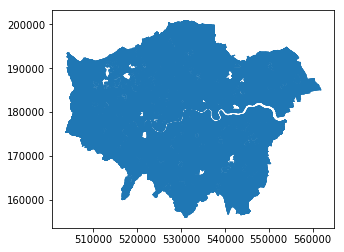

In [30]:
london_msoa_lfb.plot()

## 4.4.2 Exercise - Checking points that didn't join

- Use **`gpd.overlay`**() and **`symmetric_difference`** to find point that didn't join.
- Save those to a new object called **`lfb_msoa_symmetric_difference`**
- Create an interactive map of the points and see why they did not join.
- Because we used the **`intersection`** operation on our **`gpd.sjoin`** function, none intersecting points were not included in the **`london_msoa_lfb`** output. <br>
There wont be any need to remove those.

*Solution*

In [31]:
lfb_msoa_symmetric_difference = gpd.overlay(lfb_gdf, london_msoa_lfb, how='symmetric_difference')

In [32]:
lfb_msoa_symmetric_difference

incident_number_1  cal_year_1 type_of_incident_1  cost_gbp_1  \
0             D1925      2012.0    Special Service       260.0   
1             C2216      2012.0    Special Service       260.0   
2             F6360      2019.0    Special Service       678.0   

                                 final_description_1 animal_group_parent_1  \
0            DOG TRAPPED ON MUD BANK OF RIVER THAMES                   Dog   
1               COW IN DISTRESS IN GRAND UNION CANAL                   Cow   
2  FOX TRAPPED ON PILLAR     CALLER WAITING FOR Y...                   Fox   

  property_category_1 ward_code_1              ward_1 stn_ground_name_1  ...  \
0             Outdoor   E05000362           Isleworth            Heston  ...   
1             Outdoor   E05000330           Harefield           Ruislip  ...   
2   Outdoor Structure   E05011095  BOROUGH & BANKSIDE           Dowgate  ...   

   easting_2  northing_2 LAD19CD_2 LAD19NM_2 LAD19NMW_2  BNG_E_2  BNG_N_2  \
0        NaN         NaN       NaN       NaN        NaN      NaN      NaN   
1        NaN         NaN       NaN       NaN        NaN      NaN      NaN   
2        NaN         NaN       NaN       NaN        NaN      NaN      NaN   

   LONG_2  LAT_2                       geometry  
0     NaN    NaN  POINT (516650.000 175850.000)  
1     NaN    NaN  POINT (504050.000 191350.000)  
2     NaN    NaN  POINT (531650.000 180550.000)  

[3 rows x 42 columns]

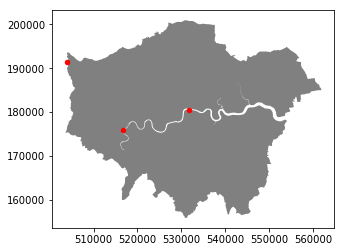

In [33]:
f, ax = plt.subplots()
london_boundary.plot(ax=ax, color='grey')
lfb_msoa_symmetric_difference.plot(ax=ax, marker='o', color='red', markersize=20)

## 4.4.3 Exercise - MSOA summary statistics

- The step requires you to be familiar with pandas' more advanced functions. If you are struggling with this step load data/gpkg/msoa_lfb.gpkg as **`msoa_lfb`** using **`.gpd_read`**.
- Use the pandas drop function on **`london_msoa_lfb`** to remove geometry data, name the output **`lfb_msoa_stats`**
- Create summary statistics per MSOA - sum of **`cost_gbp`** as **`total_cost`** and the total number of incidents as **`n_cases`**. You will need to use **`.group_by()`** and **`.agg()`**
- Create a new column on **`lfb_msoa_stats`** called **`cost_per_incident`** using **`total_cost`** divided by **`n_cases`**. For example: <br> 
> **`df['new_column'] = df.column1/df.column2`**
- Join **`lfb_msoa_stats`** to **`msoa_london`**, using the **`.merge()`** function with **`left_join()`** and create a new object **`msoa_lfb`**

In [34]:
lfb_msoa_stats = london_msoa_lfb.drop(columns = ['geometry'])

In [35]:
lfb_msoa_stats = lfb_msoa_stats.groupby('msoa11cd').cost_gbp.agg(['count', 'sum']).reset_index().rename(columns={'count':'n_cases','sum' : 'total_cost'})

In [36]:
lfb_msoa_stats.head()

msoa11cd  n_cases  total_cost
0  E02000001       12      3750.0
1  E02000002        7      2221.0
2  E02000003       11      4779.0
3  E02000004        7      2917.0
4  E02000005        4      1113.0

In [37]:
lfb_msoa_stats['cost_per_incident'] = lfb_msoa_stats.total_cost/lfb_msoa_stats.n_cases

In [38]:
lfb_msoa_stats.head()

msoa11cd  n_cases  total_cost  cost_per_incident
0  E02000001       12      3750.0         312.500000
1  E02000002        7      2221.0         317.285714
2  E02000003       11      4779.0         434.454545
3  E02000004        7      2917.0         416.714286
4  E02000005        4      1113.0         278.250000

In [39]:
msoa_lfb = pd.merge(msoa_london, lfb_msoa_stats, on = 'msoa11cd', how = 'left')

In [40]:
msoa_lfb.head()

msoa11cd                  msoa11nm  \
0  E02000001        City of London 001   
1  E02000002  Barking and Dagenham 001   
2  E02000003  Barking and Dagenham 002   
3  E02000004  Barking and Dagenham 003   
4  E02000005  Barking and Dagenham 004   

                                            geometry  n_cases  total_cost  \
0  MULTIPOLYGON (((531667.621 180534.992, 531647....     12.0      3750.0   
1  POLYGON ((548881.560 190845.265, 548881.122 19...      7.0      2221.0   
2  POLYGON ((549102.435 189324.625, 548954.497 18...     11.0      4779.0   
3  POLYGON ((551549.995 187364.637, 551477.997 18...      7.0      2917.0   
4  POLYGON ((549099.631 187656.076, 549161.372 18...      4.0      1113.0   

   cost_per_incident  
0         312.500000  
1         317.285714  
2         434.454545  
3         416.714286  
4         278.250000

At this stage it is a good idea to save our data. We can do this using the **`output_filename.to_file()`** function. It needs the following to create a spatial output: <br>
- A GeoDataFrame
- The file path where the output is to be stored
- A name for the output
- The file extension for the spatial output. e.g.(**`.shp`** for shapefiles) 

>If something has gone wrong with your final output, a complete **`msoa_lfb.gpkg`** is available in the data folder for you to load and use.

## 4.4.4 Exercise - save data to shapefile

In [41]:
#msoa_lfb.to_file('R:/Musa/Geospatial/2021/Spatial/Intro_GIS_Python/outputs/msoa_lfb.shp')

## 5 Making better maps

Now that we have processed our data we can start mapping it. <br>
The following is a step by step guide to creating a choropleth map using **`msoa_lfb`**

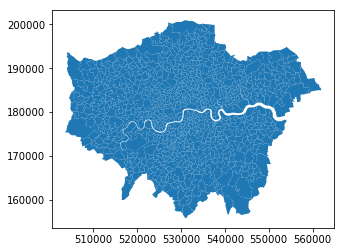

In [42]:
msoa_lfb.plot()

### Doing more within our map. 

Next, we may want to Increasing the size of our map to make it larger on the screen. We will need an additional command to achieve this. <br>
The **`plt.subplots()`** command, when called without any inputs, creates two different objects: a Figure object (**`fig`**) and an Axes object (**`ax`**). <br>
The Figure object is a container that holds everything that you see on the page. The Axes is the part of the page that holds the data. It is the canvas on which we will draw with our data, to visualize it

It is also this canvas that we need to manipulate in order to increase the size of our map. This is specified with the argument **`figsize`**
The first number represents the width, the X axis, and the second corresponds with the height, the Y axis.

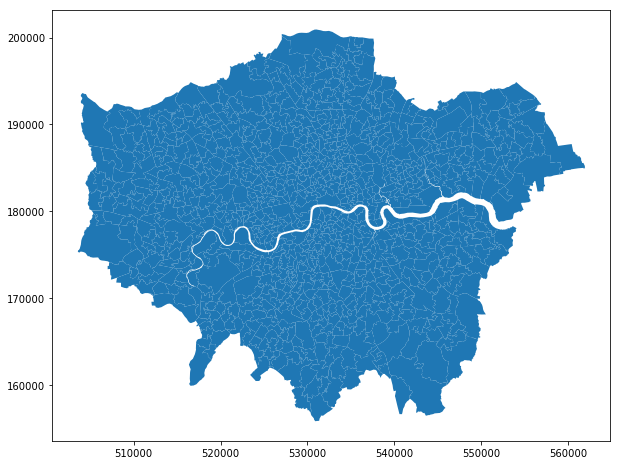

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = msoa_lfb.plot(ax=ax)

We can specify a variable that we would like the map to visualise. We just need to set the column argument equal to a column with normalised numerical data. We can do this by passing **`cost_per_incident`** onto the column argument.<br>The holes on the map indicate that there is missing data. We will have to take this into consideration for our finished map.

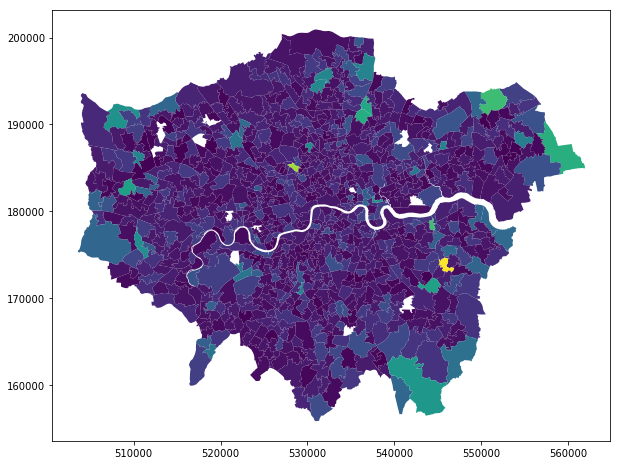

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = msoa_lfb.plot(column='cost_per_incident', ax=ax)

We can also select a classification method to bin our data into categories. We will use Quantiles and pass it onto the **`scheme`** argument. The **`k`** argument specifies the number of categories we want to split our data by. 

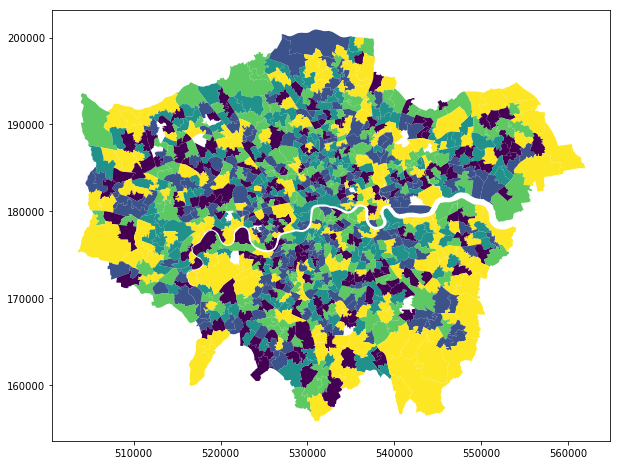

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
msoa_lfb.plot(column='cost_per_incident', scheme='Quantiles',k = 5, ax=ax)

We can also specify a colour using the cmap argument. 
cmap which stands for colormap is an inbuilt matplotlib dictionary that contains various sets of color styles. 
The matplotlib colormaps are divided into the following categories: **Sequantial**, **Diverging**, and **Qualitative**. A list of some of the color options are given below:

- **Perceptually Uniform Sequential** <br>`['viridis', 'plasma', 'inferno', 'magma']`

- **Sequential** <br>`['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']`

- **Diverging**<br>`['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']`

- **Qualitative**<br>`['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']`

- **Miscellaneous**<br>`['flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv', 'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']`

Geopandas selects a sequantial colourmap when the column plotted has numerical data. The default colourmap is called **`viridis`**. We need to change this to a more appropriate colourmap for a choropleth map. For example, something that has colors that stay near or in the same colour family.
We are interested in a sequantial colour style and will be selecting `'Blues'`. 
To add a legend, we just need to pass **`legend = True`** and this will do the job.

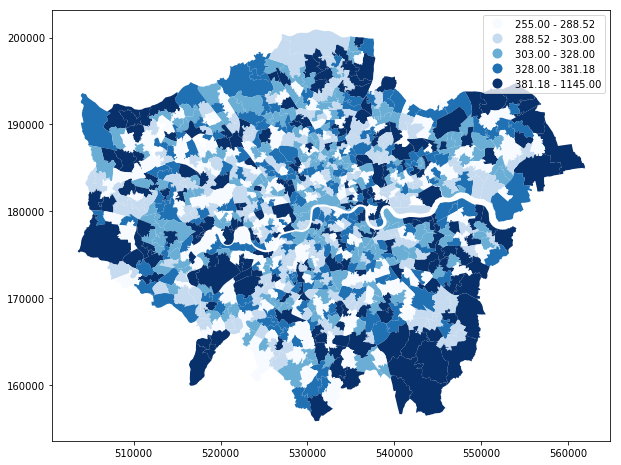

In [46]:
fig, ax = plt.subplots(figsize=(10,10))
msoa_lfb.plot(column='cost_per_incident', scheme='Quantiles',k = 5, cmap = 'Blues', legend =True, ax=ax)

We can add a title to out map using the **`plt.title()`** function

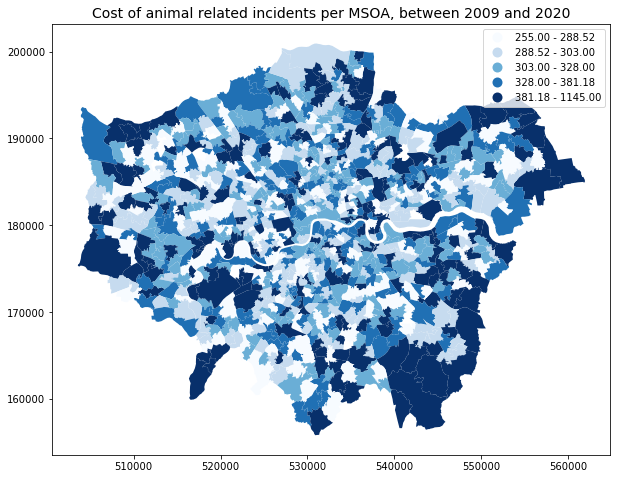

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
msoa_lfb.plot(column= 'cost_per_incident', ax = ax, scheme='QUANTILES', k = 5, cmap='Blues', legend=True)
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

We can also change our mapped variable and select a different classification scheme to split our data. We will use **`equal_interval`** and increase our number of categories to six on the **`total_cost`** variable.

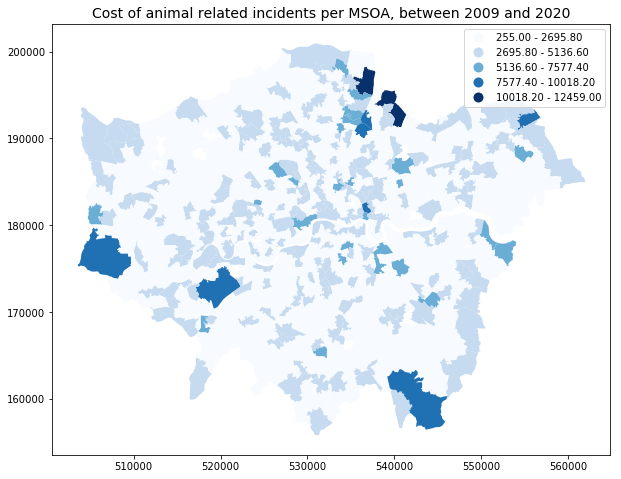

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
msoa_lfb.plot(column= 'total_cost', ax = ax, scheme='equal_interval', k = 5, cmap='Blues', legend=True)
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

We can also increase the number of our categories using the **`k=`** argument. We will increase ours to '9' for the map.

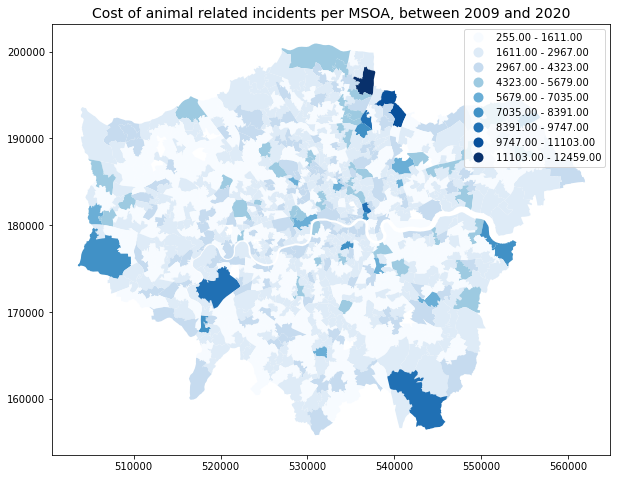

In [49]:
ax = msoa_lfb.dropna().plot(column='total_cost', cmap='Blues', figsize=(10,10), scheme='equal_interval', k=9, legend=True)
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

Alternatively, we may want to use a customised classification to break our data. We need the **`classification_kwds=dict(bins=[])`** argument to achieve this and specify the bins inside the square brackets. <br>
As we know from one of the previous maps, some areas on the map have no data and will normally have a white background. This is often hard to spot on a sequential colour style therefore we need to distinguish these areas from those which have low category values shown with the lighter colour shades. <br>

We will have to add a new category to highlight such areas on the map and label them on the legend as missing values.<br> 
The argument **`missing_kwds`** enables this functionality. **`"color"`** controls how areas with missing values will be represented on the map while **`"label"`** defines the description to be shown on the legend.

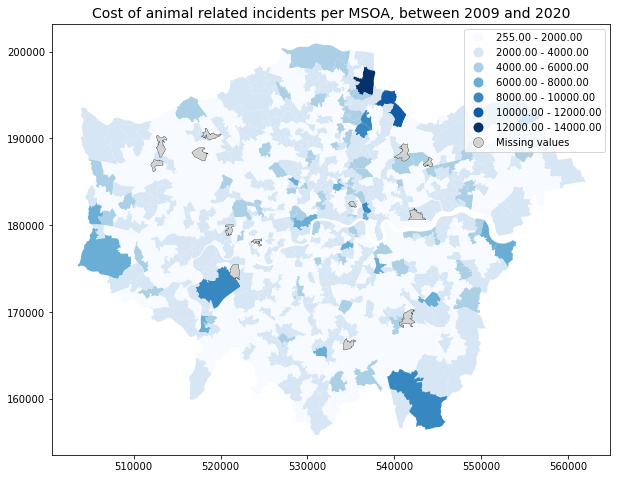

In [50]:
ax = msoa_lfb.plot(column='total_cost', cmap='Blues', figsize=(10,10), scheme="User_Defined", legend=True, 
                   classification_kwds=dict(bins=[2000, 4000, 6000, 8000, 10000, 12000, 14000]), 
                   missing_kwds={"color": "lightgrey", "edgecolor": "black", "linewidth": "0.3","label": "Missing values",},)
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

Now that we have our legend and happy with the categories to classify our data, we need to tidy up our canvas by increasing the figure size and moving our legend. We will also add a title for our legend.<br>
This can be done using the **`legend_kwds`** argument. We can also specify the position of our legend on the map within this argument. 

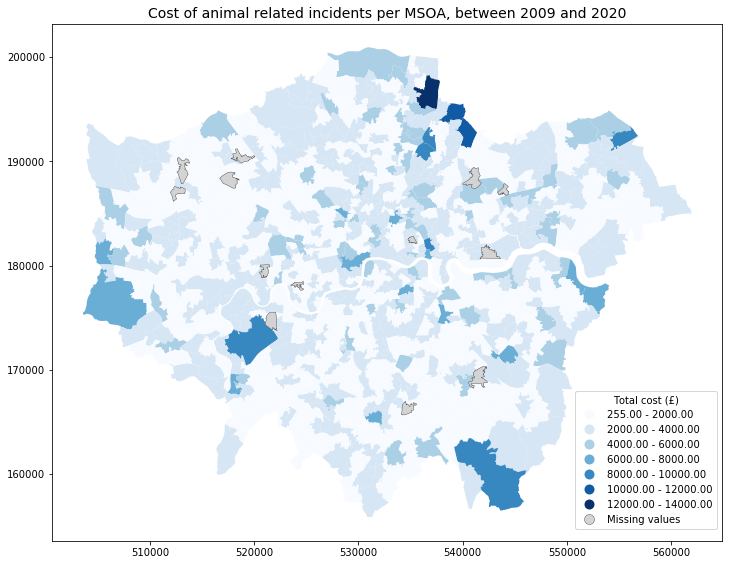

In [51]:
ax = msoa_lfb.plot(column='total_cost', cmap='Blues', figsize=(12,10), scheme="User_Defined", legend=True, 
                   classification_kwds=dict(bins=[2000, 4000, 6000, 8000, 10000, 12000, 14000]),
                   missing_kwds={"color": "lightgrey", "edgecolor": "black", "linewidth": "0.3","label": "Missing values",},
                   legend_kwds={'bbox_to_anchor':(1,0.3), 'title':'Total cost (£)'})
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

Looking at our map, it is clear that regions with similar values can be hard to differentiate. It can also be difficult to identify the edges of our map where the colours are light making it seem like they merge with the white background.
We can get around this to add a bit of clarity on our map with some boundary lines for each area by using **`edgecolor`** to outline the area polygons and **`linewidth`** to set the thickness of the lines. <br>
**`0`** is the lowest value you can assign for **`linewidth`** and **`1`** the highest.

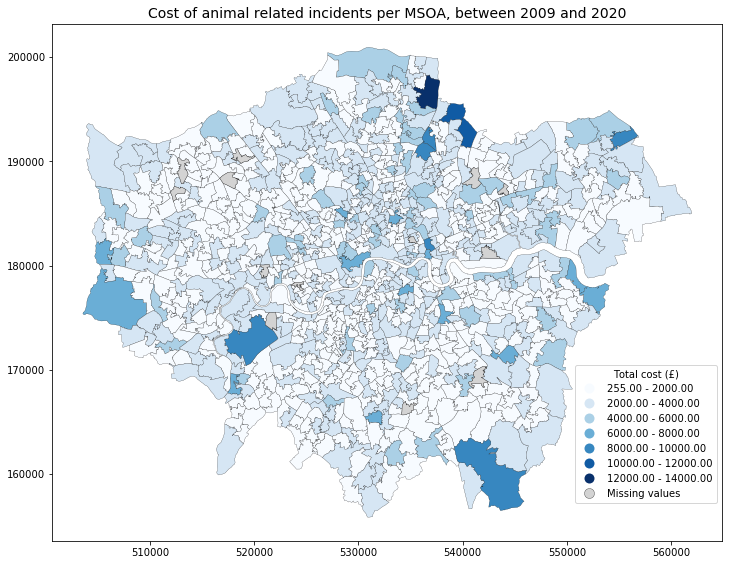

In [52]:
ax = msoa_lfb.plot(column='total_cost', cmap='Blues', edgecolor = 'k', 
                   linewidth = 0.2, figsize=(12,10), scheme="User_Defined", legend=True,
                   classification_kwds=dict(bins=[2000, 4000, 6000, 8000, 10000, 12000, 14000]),
                   missing_kwds={"color": "lightgrey", "edgecolor": "black", "linewidth": "0.3","label": "Missing values",},
                   legend_kwds={'bbox_to_anchor':(1,0.35), 'title':'Total cost (£)'})
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

Mapping **Average cost per incident** and redefining our customised categories.

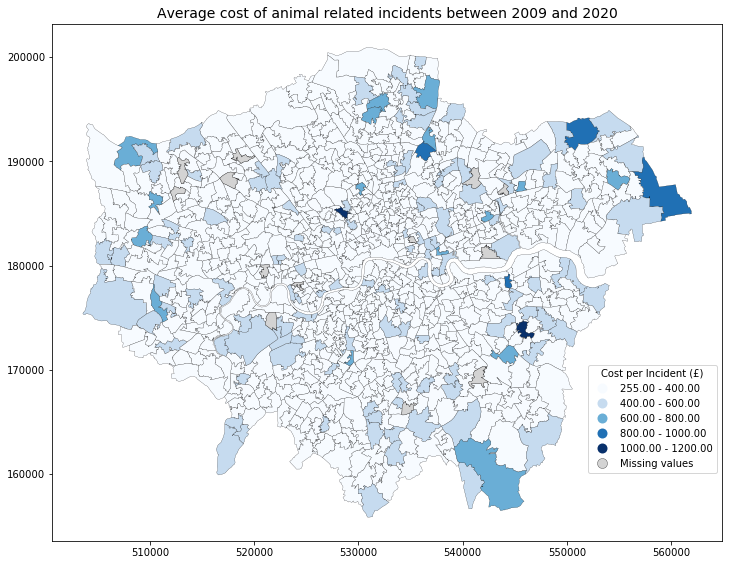

In [53]:
ax = msoa_lfb.plot(column='cost_per_incident', cmap='Blues', edgecolor = 'k', 
                   linewidth = 0.2, figsize=(12,10), scheme="User_Defined", legend=True,
                   classification_kwds=dict(bins=[400, 600, 800, 1000, 1200]),
                   missing_kwds={"color": "lightgrey", "edgecolor": "black", "linewidth": "0.3","label": "Missing values",},
                   legend_kwds={'bbox_to_anchor':(1,0.35), 'title':'Cost per Incident (£)'})
plt.title('Average cost of animal related incidents between 2009 and 2020', size = 14)

## Saving maps to figures

Exporting maps a map in Python can be done by using the command **`plt.savefig`**.

We just need to specify the filetype as **`.png`**. We can also add an additional argument to this to specify the size we wish our image to be. For example, for a high definition quality image, we can use 1080. <br>
>**`plt.savefig('output_name.png', dpi = 300)`**

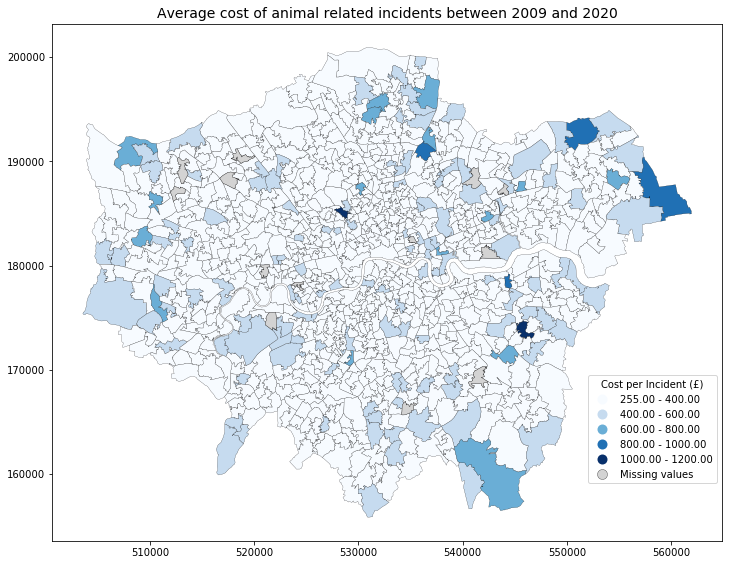

In [54]:
ax = msoa_lfb.plot(column='cost_per_incident', cmap='Blues', edgecolor = 'k', 
                   linewidth = 0.2, figsize=(12,10), scheme="User_Defined", legend=True, 
                   classification_kwds=dict(bins=[400, 600, 800, 1000, 1200]),
                   missing_kwds={"color": "lightgrey", "edgecolor": "black", "linewidth": "0.3","label": "Missing values",},
                   legend_kwds={'bbox_to_anchor':(1,0.33), 'title':'Cost per Incident (£)'})
plt.title('Average cost of animal related incidents between 2009 and 2020', size = 14)
#plt.savefig('R:/Musa/Geospatial/2021/Spatial/Intro_GIS_Python/outputs/msoa_lfb.png', dpi = 300)

**Congratulations!** You have completed the Introduction to Geography in Python Course. **Well done!**